# Line Chart with Matplotlin

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
# Setting seaborn as default style even if use only matplotlib
sns.set()

### Data Visualizations from Pandas DataFrame

In [11]:
# grouped daily customer date
grouped_daily_customer_data_url = "https://raw.githubusercontent.com/nyangweso-rodgers/Data_Analytics/main/Analytics-with-Python/Exploratory-Data-Analysis-with-Python/Exploratory-Data-Analysis-for-Online-Retail-Store/grouped_daily_customer_data.csv"
grouped_daily_customer_df = pd.read_csv(grouped_daily_customer_data_url, parse_dates=['Date', 'MonthYear', 'Week'])
print("Grouped Daily Customer DataFrame: ", grouped_daily_customer_df.shape)

Grouped Daily Customer DataFrame:  (16766, 7)


In [12]:
# preview the data
grouped_daily_customer_df.head()

,CustomerID,Date,Country,MonthYear,Week,TotalAmount,CountOfUniqueInvoices
0,12346.0,2011-01-18,United Kingdom,2011-01-01,2011-01-17,77183.60,1
1,12347.0,2010-12-07,Iceland,2010-12-01,2010-12-06,711.79,1
2,12347.0,2011-01-26,Iceland,2011-01-01,2011-01-24,475.39,1
3,12347.0,2011-04-07,Iceland,2011-04-01,2011-04-04,636.25,1
4,12347.0,2011-06-09,Iceland,2011-06-01,2011-06-06,382.52,1


In [14]:
grouped_daily_customer_df['CustomerID'] = grouped_daily_customer_df['CustomerID'].astype(float)
grouped_daily_customer_df.dtypes

CustomerID                      float64
Date                     datetime64[ns]
Country                          object
MonthYear                datetime64[ns]
Week                     datetime64[ns]
TotalAmount                     float64
CountOfUniqueInvoices             int64
dtype: object

#### Data Aggregations for Visualizations

In [38]:
# -- get month on month total sales value
monthly_sales_value_df = grouped_daily_customer_df.groupby('MonthYear').agg(
    TotalAmount = pd.NamedAgg(column='TotalAmount', aggfunc='sum'),
).reset_index()

# -- get month on month count of customers and invoices
monthly_customers_df = grouped_daily_customer_df.groupby('MonthYear').agg(
    UniqueCustomersInvoiced = pd.NamedAgg(column='CustomerID', aggfunc='nunique'),
    CountOfUniqueInvoices = pd.NamedAgg(column='CountOfUniqueInvoices', aggfunc='sum')
).reset_index()

In [40]:
monthly_sales_value_df.head()

,MonthYear,TotalAmount
0,2010-12-01,572713.890
1,2011-01-01,569445.040
2,2011-02-01,447137.350
3,2011-03-01,595500.760
4,2011-04-01,469200.361


In [39]:
monthly_customers_df.head()

,MonthYear,UniqueCustomersInvoiced,CountOfUniqueInvoices
0,2010-12-01,885,1400
1,2011-01-01,741,987
2,2011-02-01,758,998
3,2011-03-01,974,1321
4,2011-04-01,856,1149


### Plot 1: Baseline Plot

In [42]:
# set date column to index
monthly_customers_df.set_index('MonthYear',inplace = True)
monthly_customers_df.head()

,UniqueCustomersInvoiced,CountOfUniqueInvoices
MonthYear,,
2010-12-01,885,1400
2011-01-01,741,987
2011-02-01,758,998
2011-03-01,974,1321
2011-04-01,856,1149


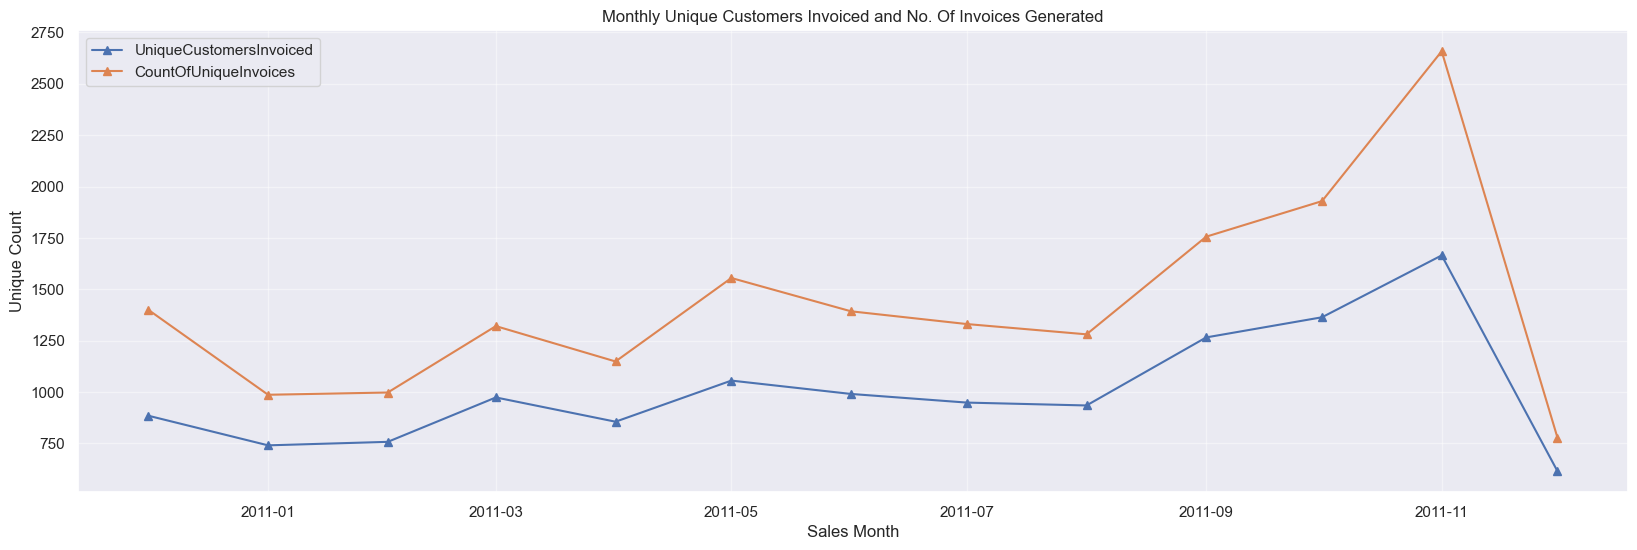

In [46]:
# plot size and configuration
fig,ax = plt.subplots(figsize = (20,6))

# lines
for i in monthly_customers_df.columns:
    plt.plot(monthly_customers_df.index, monthly_customers_df[i],marker = '^',label = f'{i}')
    
# format y-axis
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1,decimals = 0))

# add title and axis labels
plt.title('Monthly Unique Customers Invoiced and No. Of Invoices Generated')
plt.ylabel('Unique Count')
plt.xlabel('Sales Month')

# misc - grid and legend
plt.grid(axis = 'both',alpha = 0.45)
plt.legend(loc = 'best',ncol = 1)

# results
plt.show()



### Plot 1.1 Baseline Plot - Using Descriptive Titles
* We can add descriptive titles using the __text__ command.

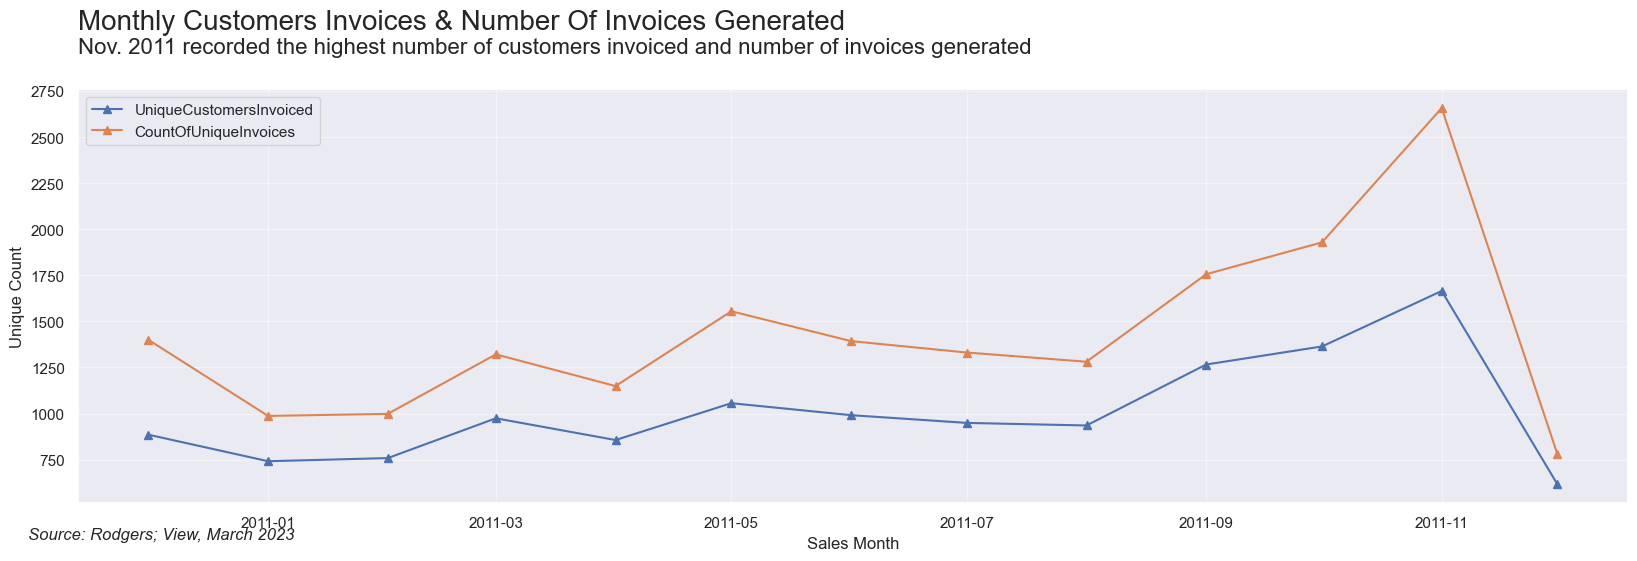

In [50]:
# plot size and configuration
fig,ax = plt.subplots(figsize = (20,6))

# informative title + subtitle
title ="Monthly Customers Invoices & Number Of Invoices Generated"
subtitle = "Nov. 2011 recorded the highest number of customers invoiced and number of invoices generated"

# add title + subtitle to plot
plt.text(
    x = 0.125,y = 0.90,s = title,fontname = 'Arial',
    fontsize = 20,ha='left',transform = fig.transFigure
)
plt.text(
    x = 0.125,y = 0.86,s = subtitle,fontname = 'Arial',
    fontsize = 16,ha = 'left',transform = fig.transFigure
)

# -- adding foot note
footnote = "Source: Rodgers; View, March 2023"
plt.text(
    x = 0.1,
    y = 0.05,
    s = footnote,
    fontname = 'Arial',
    fontstyle = 'italic',
    fontsize = 12,
    ha = 'left',
    transform = fig.transFigure
)


# lines
for i in monthly_customers_df.columns:
    plt.plot(monthly_customers_df.index, monthly_customers_df[i],marker = '^',label = f'{i}')
    
# format y-axis
#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1,decimals = 0))

#  axis labels
plt.ylabel('Unique Count')
plt.xlabel('Sales Month')

# misc - grid and legend
plt.grid(axis = 'both',alpha = 0.45)
plt.legend(loc = 'best',ncol = 1)

# fiddle with space above chart
plt.subplots_adjust(top=0.8, wspace=0.3)

# results
plt.show()

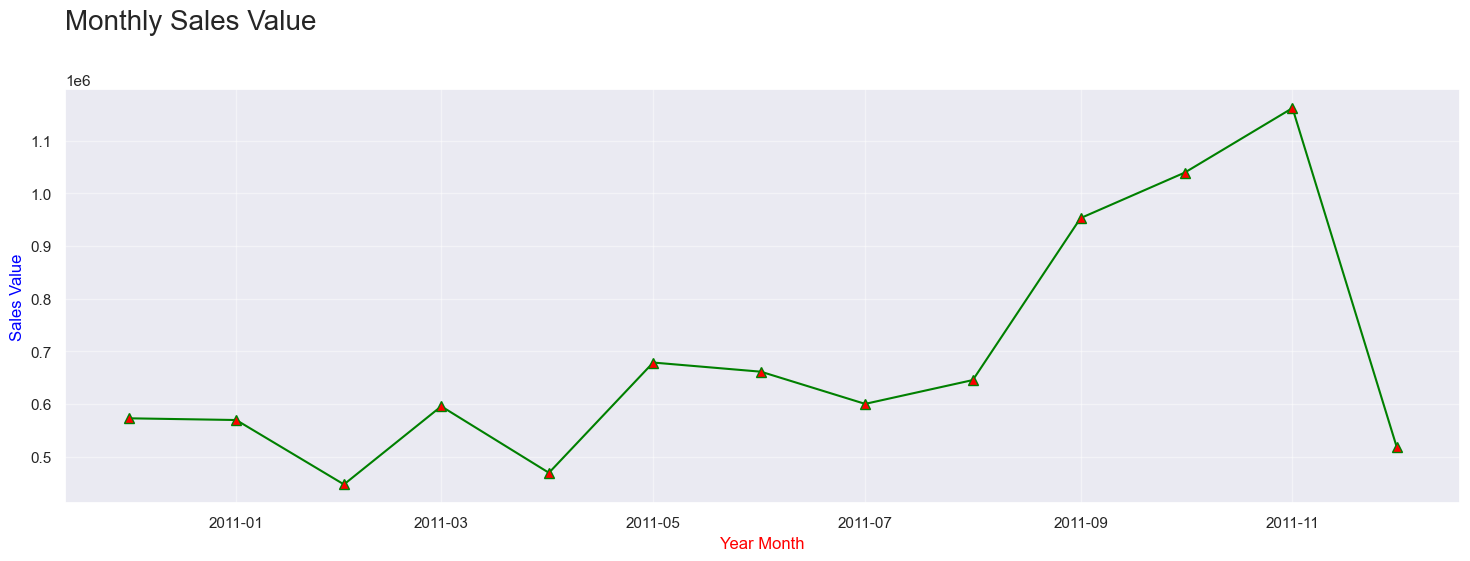

In [52]:
# plot size and configuration
fig, axes = plt.subplots(1,1, figsize=(18,6), sharey=True)

plt.plot(monthly_sales_value_df.MonthYear, monthly_sales_value_df.TotalAmount, marker = '^', label = f'{i}', color='green', linestyle='solid', markersize=7, markerfacecolor='red')
    
# information title + subtitle
title = "Monthly Sales Value"
subtitle = "Highest Sales Value was recorded in Nov. 2011"

# add title + subtitle to plot
plt.text(
    x = 0.125, y = 0.9, s = title, fontname = "Arial",
    fontsize = 20, ha='left', transform = fig.transFigure
)

# axis labels
plt.ylabel('Sales Value', color='blue')
plt.xlabel('Year Month', color='red')

# misc - grid and legend
plt.grid(axis = 'both',alpha = 0.45)
#plt.legend(loc = 'best',ncol = 0)

# fiddle with space above chart
plt.subplots_adjust(top=0.8, wspace=0.3)

# results
plt.show()